<a href="https://colab.research.google.com/github/SaloniJhalani/Motive-Driver-App-Reviews-Sentiment-Analysis/blob/main/Motive_Driver_App_Reviews_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Links - 1. https://pypi.org/project/app-store-scraper/
2. https://github.com/JoMingyu/google-play-scraper
3. https://www.youtube.com/watch?v=GVwjR6lkS6Q

<h2> Import Libraries </h2>



In [1]:
# Installing google play store & app store scraper
!pip install google-play-scraper
!pip install app-store-scraper
!pip install textblob
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 KB 826.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 KB 17.6 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled chardet-4.0.0
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.15
    Uninstalling urllib3-1.26.15:
      Successfully uninstalled urllib3-1.26.15
  Attempting uninstall: idna
    Found existing installation: idna 3.4
    Uninstalling idna-3.4:
      Successfully uninstalled idna-3.4
  Attempting uninstall:

In [2]:
#Import Libraries
from google_play_scraper import app,Sort,reviews_all
from app_store_scraper import AppStore
import pandas as pd
import numpy as np
import json,os,uuid
import matplotlib.pyplot as plt

<h2> Data Collection </h2>

In [ ]:
#Collect all the Motive reviews from Google Play Store
g_reviews = reviews_all(
    'com.keeptruckin.android',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    country ='us', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT
)
print(g_reviews)

In [ ]:
#Collect all the Motive reviews from App Store
a_reviews = AppStore('us','motive-driver-ex-keeptruckin','706401738')
a_reviews.review(how_many=5000,sleep=1)
print(a_reviews)

<h2> Combining Data from Google Play Store & App Store </h2>

In [ ]:
g_df = pd.DataFrame(np.array(g_reviews),columns=['review'])
g_df2 = g_df.join(pd.DataFrame(g_df.pop('review').tolist()))
g_df2.drop(['userImage', 'reviewCreatedVersion','thumbsUpCount'],axis='columns',inplace = True)
g_df2.rename(columns= {'score': 'rating','userName': 'user_name', 'reviewId': 'review_id', 'content': 'review_description', 'at': 'review_date', 'replyContent': 'developer_response', 'repliedAt': 'developer_response_date'},inplace = True)
g_df2.insert(loc=0, column='source', value='Google Play')
g_df2.insert(loc=3, column='review_title', value=None)
g_df2.head()

,source,review_id,user_name,review_title,review_description,rating,review_date,developer_response,developer_response_date
0,Google Play,49dc1f4a-3c22-4aba-8d73-6db2238b08c7,William Davis,None,"Great app, but the last update made the timers...",4,2023-02-07 02:57:51,"Thanks for your valued feedback! At Motive, we...",2023-02-08 04:14:53
1,Google Play,31c19b0e-17dd-413f-be7d-4e12fa8a61da,Kevin Hyatt,None,Stupid app is always disconnecting from the tr...,1,2023-03-05 09:32:05,We're sorry to hear that you didn't have a gre...,2023-03-06 10:58:57
2,Google Play,c3380d4d-20c9-4ac5-9f06-aee1c642482f,Gabriel Reed,None,This system is terrible. It constantly tells m...,1,2023-02-15 18:14:16,We're sorry to hear that you didn't have a gre...,2023-02-16 20:20:16
3,Google Play,7e556158-3f36-4abf-9f14-78b25b097194,Stephen Vance,None,I'd give this negative stars if I could. This ...,1,2023-03-01 02:12:50,We're sorry to hear that you didn't have a gre...,2023-03-02 04:54:27
4,Google Play,260330eb-93db-4de9-bf19-b645664487ae,Frank Ward,None,"When I go to review my safety issues, it pops ...",3,2022-10-28 20:25:43,We're sorry to hear that you didn't have a gre...,2022-10-31 20:00:05


In [ ]:
a_df = pd.DataFrame(np.array(a_reviews.reviews),columns=['review'])
a_df2 = a_df.join(pd.DataFrame(a_df.pop('review').tolist()))
a_df2.drop(columns={'isEdited'},inplace = True)
a_df2.insert(loc=0, column='source', value='App Store')
a_df2['developer_response_date'] = None
a_df2.insert(loc=1, column='review_id', value=[uuid.uuid4() for _ in range(len(a_df2.index))])
a_df2.rename(columns= {'review': 'review_description','userName': 'user_name', 'date': 'review_date','title': 'review_title', 'developerResponse': 'developer_response'},inplace = True)
a_df2 = a_df2.where(pd.notnull(a_df2), None)
a_df2.head()

,source,review_id,review_date,developer_response,review_description,rating,user_name,review_title,developer_response_date
0,App Store,fb1cdae7-88ad-43f2-bc9a-f5754f3c2bc3,2019-05-02 05:29:52,"{'id': 8517988, 'body': 'Thank you for your su...",This is actually a pretty amazing app that let...,4,InZanePain,"Simple, easy to use, and could improve.",None
1,App Store,481eaed6-23b7-410d-bcff-7452aa9cb597,2017-08-18 17:42:36,"{'id': 1161623, 'body': 'Thank you so much for...",This app was suggested to me by another driver...,5,Raven-1984,Amazing!,None
2,App Store,d5c2517b-7ce9-4793-967b-7978d54d2167,2017-08-11 15:25:39,"{'id': 1023183, 'body': 'Thank you so much for...",I am driver manager for a small company delive...,5,Smuggler6,"Amazingly Simple, Incredibly Effective",None
3,App Store,f7c5b595-ced3-43f2-9e40-9b28e5d54293,2022-03-30 16:03:25,"{'id': 28798406, 'body': 'Hi Aaron, We're so s...",The recent update (march2022): I love the time...,1,aaronsmith1990,App not working for me,None
4,App Store,32e03399-9361-4bd3-af50-6def2242a53c,2020-12-05 19:19:18,"{'id': 19580167, 'body': 'Hi Eric, thank you s...",This has become my daily time card. Really the...,4,Eric Montgomery,"Simple, easy to use",None


In [ ]:
data = pd.concat([g_df2,a_df2])
data.head()

,source,review_id,user_name,review_title,review_description,rating,review_date,developer_response,developer_response_date
0,Google Play,49dc1f4a-3c22-4aba-8d73-6db2238b08c7,William Davis,None,"Great app, but the last update made the timers...",4,2023-02-07 02:57:51,"Thanks for your valued feedback! At Motive, we...",2023-02-08 04:14:53
1,Google Play,31c19b0e-17dd-413f-be7d-4e12fa8a61da,Kevin Hyatt,None,Stupid app is always disconnecting from the tr...,1,2023-03-05 09:32:05,We're sorry to hear that you didn't have a gre...,2023-03-06 10:58:57
2,Google Play,c3380d4d-20c9-4ac5-9f06-aee1c642482f,Gabriel Reed,None,This system is terrible. It constantly tells m...,1,2023-02-15 18:14:16,We're sorry to hear that you didn't have a gre...,2023-02-16 20:20:16
3,Google Play,7e556158-3f36-4abf-9f14-78b25b097194,Stephen Vance,None,I'd give this negative stars if I could. This ...,1,2023-03-01 02:12:50,We're sorry to hear that you didn't have a gre...,2023-03-02 04:54:27
4,Google Play,260330eb-93db-4de9-bf19-b645664487ae,Frank Ward,None,"When I go to review my safety issues, it pops ...",3,2022-10-28 20:25:43,We're sorry to hear that you didn't have a gre...,2022-10-31 20:00:05


In [ ]:
#Storing Data
data.to_csv('motive_reviews.csv')

In [4]:
data = pd.read_csv('motive_reviews.csv')
data.drop(['Unnamed: 0','thumbs_up','laguage_code','country_code'],axis='columns',inplace=True)

<h2> Exploratory Data Analysis </h2>

In [5]:
data.shape

(18220, 9)

In [6]:
data.columns

Index(['source', 'review_id', 'user_name', 'review_title',
       'review_description', 'rating', 'review_date', 'developer_response',
       'developer_response_date'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18220 entries, 0 to 18219
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   source                   18220 non-null  object
 1   review_id                18220 non-null  object
 2   user_name                18220 non-null  object
 3   review_title             3536 non-null   object
 4   review_description       18205 non-null  object
 5   rating                   18220 non-null  int64 
 6   review_date              18220 non-null  object
 7   developer_response       13318 non-null  object
 8   developer_response_date  11827 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.3+ MB


In [8]:
data.describe()

,rating
count,18220.000000
mean,4.449671
std,1.220758
min,1.000000
25%,5.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
data.describe(include='object')

,source,review_id,user_name,review_title,review_description,review_date,developer_response,developer_response_date
count,18220,18220,18220,3536,18205,18220,13318,11827
unique,2,18220,6200,2156,15383,18198,8734,11827
top,Google Play,49dc1f4a-3c22-4aba-8d73-6db2238b08c7,A Google user,Great app,Great app,2016-12-29 18:57:28,Thank you for the wonderful review! We're glad...,2023-02-08 04:14:53
freq,14684,1,11998,190,244,2,286,1


<h3> Analysis of Rating column </h3>

In [10]:
data.groupby('source').mean()

,rating
source,
App Store,4.525735
Google Play,4.431354


<p> Observations - <br>
1. Average rating of Motive Driver App across google play & app store is 4.44<br>
2. Average rating in AppStore - 4.52<br>
3. Average rating in Google Play - 4.43<br>
</p>

In [11]:
#Rating Distribution
data['rating'].value_counts().sort_index()

1     1597
2      402
3      533
4     1367
5    14321
Name: rating, dtype: int64

In [12]:
data['rating'].value_counts(normalize=True).sort_index()

1    0.087651
2    0.022064
3    0.029254
4    0.075027
5    0.786004
Name: rating, dtype: float64

<Axes: title={'center': 'Motive Driver App Ratings Distribution'}, xlabel='Rating', ylabel='No. of occurences'>

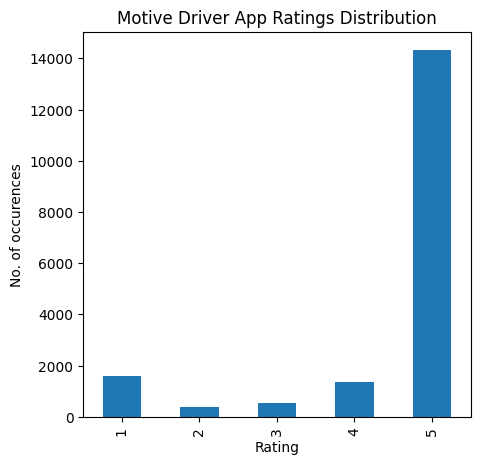

In [13]:
plt.figure(figsize=(5,5))
plt.title('Motive Driver App Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('No. of occurences')
data['rating'].value_counts().sort_index().plot(kind='bar')

In [14]:
pd.crosstab(data['rating'],data['source'])

source,App Store,Google Play
rating,,
1,277,1320
2,61,341
3,89,444
4,208,1159
5,2901,11420


Text(0, 0.5, '% of occurences')

<Figure size 500x500 with 0 Axes>

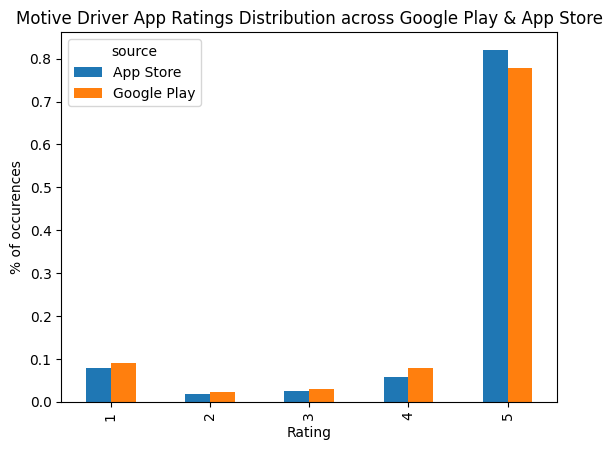

In [15]:
plt.figure(figsize=(5,5))
pd.crosstab(data['rating'],data['source'],normalize='columns').plot(kind='bar')
plt.title('Motive Driver App Ratings Distribution across Google Play & App Store')
plt.xlabel('Rating')
plt.ylabel('% of occurences')

<p> Obeservations - <br>
1. 78.6% of Motive DriverApp Customers has given 5 rating. <br>
2. 8.7% of Motive DriverApp customers has given 1 rating. <br>
3. Ratings distribution is almost same in both Google Play Store & App Store. 
</p>

<h3> Analysis of Source Column </h3>

In [16]:
#Source Distribution
data['source'].value_counts(normalize=True)

Google Play    0.805928
App Store      0.194072
Name: source, dtype: float64

(array([0, 1]), [Text(0, 0, 'Google Play'), Text(1, 0, 'App Store')])

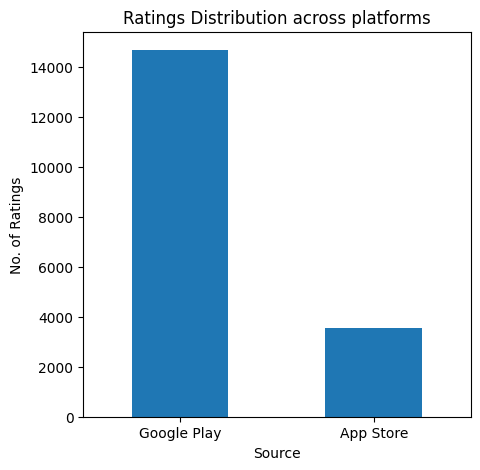

In [17]:
plt.figure(figsize=(5,5))
data['source'].value_counts().plot(kind='bar')
plt.title('Ratings Distribution across platforms')
plt.xlabel('Source')
plt.ylabel('No. of Ratings')
plt.xticks(rotation=0)

<h2> Data Cleaning </h2>

In [18]:
#Find no. of missing values in each column
data.isnull().sum().sort_values(ascending=False)

review_title               14684
developer_response_date     6393
developer_response          4902
review_description            15
source                         0
review_id                      0
user_name                      0
rating                         0
review_date                    0
dtype: int64

In [19]:
#Drop some columns which we don't need to do sentiment analysis of review
remove_cols = ['developer_response_date','developer_response','review_id','user_name','review_date']
data1 = data.drop(remove_cols,axis='columns')

In [20]:
#Drop review_title column as 80.5% values are null
data1.drop('review_title',axis='columns',inplace=True)

In [21]:
data1.shape

(18220, 3)

In [22]:
#Drop 14 rows where review_description is null
data1 = data1[data1['review_description'].notna()]

In [23]:
data1.shape

(18205, 3)

In [24]:
#Take 1 - Dropping source column for time being
data1.drop('source',axis='columns',inplace=True)

<h2> Data Preprocessing </h2>

In [25]:
data1.tail()

,review_description,rating
18215,Much faster to update than a paper log! Saved ...,5
18216,Great app\nIt really is a great app it warns y...,5
18217,I use the app as a backup just in case my Qual...,5
18218,"Great ! The "" learning curb completed . Manage...",5
18219,Good app. Best I have had the only problem is ...,5


In [26]:
category = []
for rating in data1['rating']:
  if rating in (4,5):
    category.append("Satisfied")
  elif rating == 3:
    category.append("Neutral")
  else:
    category.append("Disappointed")

In [27]:
data1['category'] = category

<h2> Build Model </h2>

<h4> Text Blob </h4>

In [28]:
data_textblob = data1.copy()

In [29]:
from textblob import TextBlob

In [30]:
data_textblob['polarity'] = data_textblob['review_description'].apply(lambda review: TextBlob(review).sentiment.polarity)

In [31]:
data_textblob.shape

(18205, 4)

In [32]:
data_textblob.head()

,review_description,rating,category,polarity
0,"Great app, but the last update made the timers...",4,Satisfied,0.149167
1,Stupid app is always disconnecting from the tr...,1,Disappointed,-0.450000
2,This system is terrible. It constantly tells m...,1,Disappointed,-0.054179
3,I'd give this negative stars if I could. This ...,1,Disappointed,-0.177244
4,"When I go to review my safety issues, it pops ...",3,Neutral,-0.157143


In [34]:
text_blob_category = []
for polarity in data_textblob['polarity']:
  if polarity > 0.1:
    text_blob_category.append('Satisfied')
  elif polarity <=0.1 and polarity >= -0.1:
    text_blob_category.append('Neutral')
  else:
    text_blob_category.append('Disappointed')

In [35]:
data_textblob['text_blob_category'] = text_blob_category

In [36]:
data_textblob.head(15)

,review_description,rating,category,polarity,text_blob_category
0,"Great app, but the last update made the timers...",4,Satisfied,0.149167,Satisfied
1,Stupid app is always disconnecting from the tr...,1,Disappointed,-0.450000,Disappointed
2,This system is terrible. It constantly tells m...,1,Disappointed,-0.054179,Neutral
3,I'd give this negative stars if I could. This ...,1,Disappointed,-0.177244,Disappointed
4,"When I go to review my safety issues, it pops ...",3,Neutral,-0.157143,Disappointed
5,"Suggestions of: break, fuel, un/loading should...",3,Neutral,0.022619,Neutral
6,Less than one star! App constantly locks you i...,1,Disappointed,0.090202,Neutral
7,"Use to be good, now runs very slow. Freeze's u...",1,Disappointed,0.099048,Neutral
8,Very sluggish. Press on a key (button) and it ...,1,Disappointed,-0.350000,Disappointed
9,3 stars for frustrating mediocrity. UI is gene...,3,Neutral,-0.019958,Neutral


In [37]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(data_textblob['category'],data_textblob['text_blob_category'])

0.7547377094204889

In [38]:
print(classification_report(data_textblob['category'],data_textblob['text_blob_category']))

              precision    recall  f1-score   support

Disappointed       0.63      0.31      0.41      1999
     Neutral       0.06      0.44      0.11       533
   Satisfied       0.95      0.82      0.88     15673

    accuracy                           0.75     18205
   macro avg       0.55      0.52      0.47     18205
weighted avg       0.89      0.75      0.81     18205



<h4> Vader </h4>

In [39]:
data_vader = data1.copy()

In [40]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj= SentimentIntensityAnalyzer()

In [41]:
data_vader['compound'] = data_vader['review_description'].apply(lambda review: sid_obj.polarity_scores(review)['compound'])

In [43]:
vader_category = []
for compound in data_vader['compound']:
  if compound > 0.1:
    vader_category.append('Satisfied')
  elif compound <=0.1 and compound >= -0.1:
    vader_category.append('Neutral')
  else:
    vader_category.append('Disappointed')
data_vader['vader_category'] = vader_category

In [44]:
data_vader.head()

,review_description,rating,category,compound,vader_category
0,"Great app, but the last update made the timers...",4,Satisfied,0.9814,Satisfied
1,Stupid app is always disconnecting from the tr...,1,Disappointed,-0.8750,Disappointed
2,This system is terrible. It constantly tells m...,1,Disappointed,-0.3172,Disappointed
3,I'd give this negative stars if I could. This ...,1,Disappointed,-0.8507,Disappointed
4,"When I go to review my safety issues, it pops ...",3,Neutral,0.3150,Satisfied


In [45]:
from sklearn.metrics import accuracy_score,classification_report
print(classification_report(data_vader['category'],data_vader['vader_category']))

              precision    recall  f1-score   support

Disappointed       0.63      0.54      0.58      1999
     Neutral       0.07      0.27      0.10       533
   Satisfied       0.95      0.87      0.91     15673

    accuracy                           0.82     18205
   macro avg       0.55      0.56      0.53     18205
weighted avg       0.89      0.82      0.85     18205



<h4> Bag of Word Vectorization </h4>

In [47]:
data_bow = data1.copy()
data_bow.copy()

,review_description,rating,category
0,"Great app, but the last update made the timers...",4,Satisfied
1,Stupid app is always disconnecting from the tr...,1,Disappointed
2,This system is terrible. It constantly tells m...,1,Disappointed
3,I'd give this negative stars if I could. This ...,1,Disappointed
4,"When I go to review my safety issues, it pops ...",3,Neutral
...,...,...,...
18215,Much faster to update than a paper log! Saved ...,5,Satisfied
18216,Great app\nIt really is a great app it warns y...,5,Satisfied
18217,I use the app as a backup just in case my Qual...,5,Satisfied
18218,"Great ! The "" learning curb completed . Manage...",5,Satisfied


In [66]:
possible_labels = data_bow.category.unique()
label_dict = {'Disappointed': 0, 'Neutral': 1,'Satisfied': 2, }
data_bow['label'] = data_bow.category.replace(label_dict)

In [68]:
data_bow['label'].value_counts()

2    15673
0     1999
1      533
Name: label, dtype: int64

In [69]:
#Pre-Prcoessing and Bag of Word Vectorization using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts = cv.fit_transform(data_bow['review_description'])

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [70]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, 
                                                  data_bow[['label']], 
                                                  test_size=0.15, 
                                                  random_state=17, 
                                                  stratify=data_bow[['label']])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15474, 8857)
(2731, 8857)
(15474, 1)
(2731, 1)


In [71]:
#Training the model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [72]:
#Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, y_test)
print("Accuracuy Score: ",accuracy_score)

Accuracuy Score:  0.9110216038081289


In [73]:
print(metrics.classification_report(predicted, y_test))

              precision    recall  f1-score   support

           0       0.65      0.70      0.68       280
           1       0.01      0.07      0.02        15
           2       0.97      0.94      0.96      2436

    accuracy                           0.91      2731
   macro avg       0.55      0.57      0.55      2731
weighted avg       0.94      0.91      0.92      2731

